In [1]:
import pandas as panda 
from matplotlib import pyplot as plt

In [2]:
dataframe = panda.read_csv('Ruter_data.csv',delimiter=';')

# Legger til en attributt 'Brukt_Kapasitet_%', dvs. hvor fulle bussene er
dataframe['Brukt_Kapasitet_%'] = (dataframe.loc[:, 'Passasjerer_Ombord'] / dataframe.loc[:, 'Kjøretøy_Kapasitet'] * 100)
dataframe.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Brukt_Kapasitet_%
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,4.464286
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,4.464286
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,5.357143
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,8.928571
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,8.928571


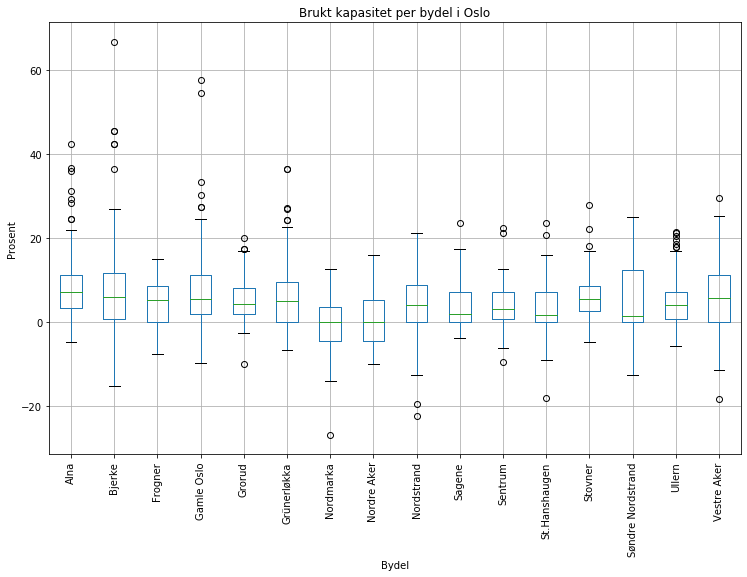

In [3]:
'''
Lager et datasett for alle linjer i Oslo
'''

is_oslo = dataframe.Fylke == 'Oslo'
oslo_data = dataframe[is_oslo]

oslo_data.boxplot(column='Brukt_Kapasitet_%', by='Kommune', figsize=(12, 8), rot=90)
plt.title('Brukt kapasitet per bydel i Oslo')
plt.suptitle('')
plt.ylabel('Prosent')
plt.xlabel('Bydel')
plt.show()

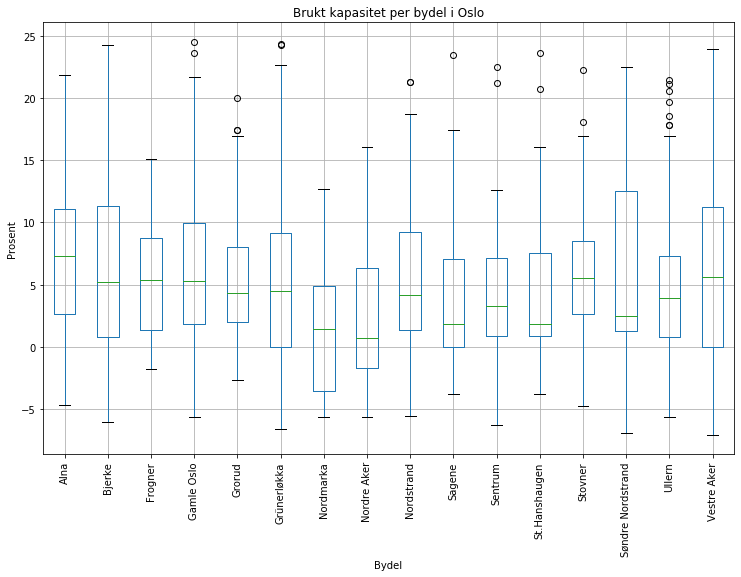

In [4]:
'''
Fjerner outliers fra datasettet for Oslo
'''

cutoff = 0.02
q_low = oslo_data['Brukt_Kapasitet_%'].quantile(cutoff)
q_high = oslo_data['Brukt_Kapasitet_%'].quantile(1 - cutoff)

odbk = oslo_data['Brukt_Kapasitet_%']

oslo_data_without_outliers = oslo_data[(odbk > q_low) & (odbk < q_high)]

oslo_data_without_outliers.boxplot(column='Brukt_Kapasitet_%', by='Kommune', figsize=(12, 8), rot=90)
plt.title('Brukt kapasitet per bydel i Oslo')
plt.suptitle('')
plt.ylabel('Prosent')
plt.xlabel('Bydel')
plt.show()

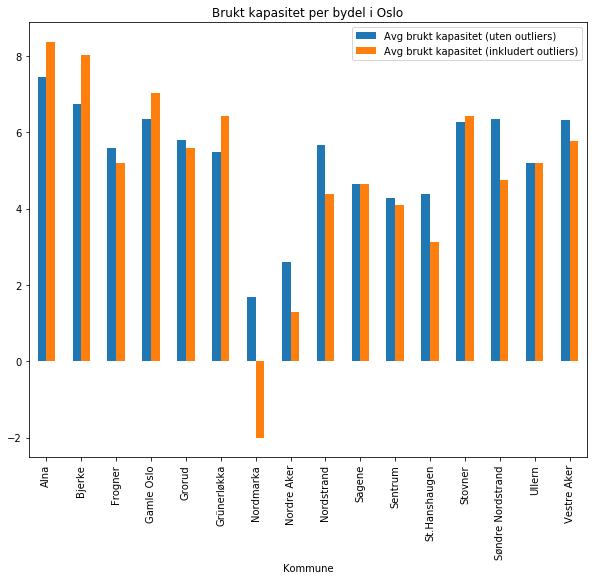

In [5]:
'''
Et plot som viser hvor mye det har å si for gjennomsnittlig 'brukt kapasitet' om man fjerner de mest ekstreme verdiene eller ikke.
'''

bus_capacity_oslo_without_outliers = oslo_data_without_outliers.groupby(by='Kommune').agg({ 'Brukt_Kapasitet_%': 'mean' })
bus_capacity_oslo = oslo_data.groupby(by='Kommune').agg({ 'Brukt_Kapasitet_%': 'mean' })

bc = panda.concat([bus_capacity_oslo_without_outliers, bus_capacity_oslo], axis=1)

ax = bc.plot.bar(figsize=(10, 8), xticks=range(len(bc)), rot=90, title='Brukt kapasitet per bydel i Oslo')
ax.legend(['Avg brukt kapasitet (uten outliers)', 'Avg brukt kapasitet (inkludert outliers)'])

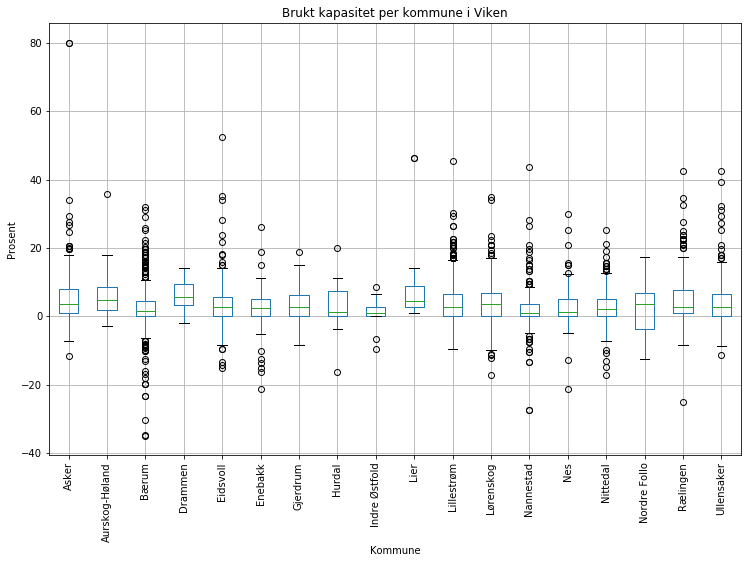

In [6]:
'''
Tilsvarende datasett for viken - man kunne gjort samme transformeringer på denne dataen. 
'''

is_viken = dataframe.Fylke == 'Viken'
viken_data = dataframe[is_viken]

viken_data.boxplot(column='Brukt_Kapasitet_%', by='Kommune', figsize=(12, 8), rot=90)
plt.title('Brukt kapasitet per kommune i Viken')
plt.suptitle('')
plt.ylabel('Prosent')
plt.xlabel('Kommune')
plt.show()

In [7]:
dataframe.agg({ 'Brukt_Kapasitet_%': 'mean' })

Brukt_Kapasitet_%    4.396286
dtype: float64